In [1]:
!pip install geopandas matplotlib
!pip install pyarrow
!pip install contextily 


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx 


C:\Users\eks510\AppData\Local\Temp\ipykernel_29132\455904113.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


C:\Users\eks510\AppData\Local\Temp\ipykernel_29132\3607456562.py:40: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


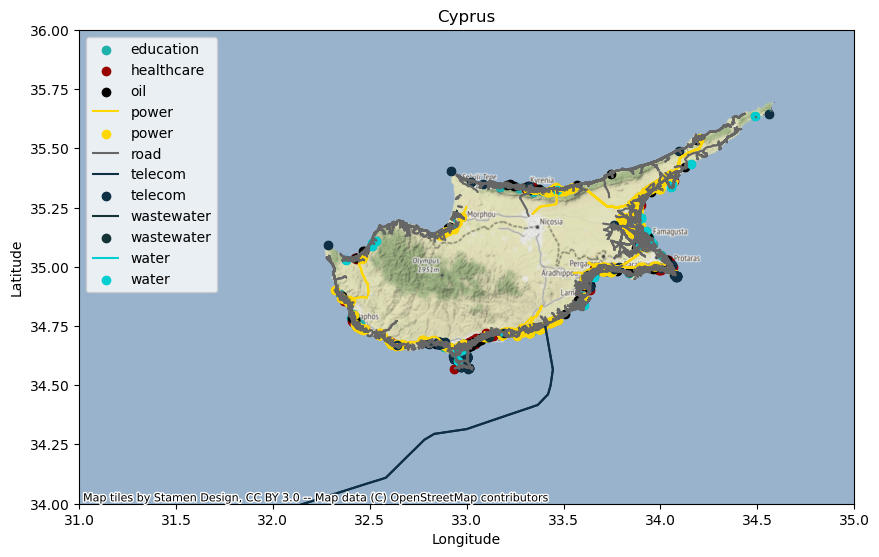

In [2]:
#read the parquet file with geopandas
cyprusdata = gpd.read_parquet('C:\Data\CEED\coastal_osm_exact/CYP_cis.parquet')
#select column containing the infrastructure type 
cyprusdata = cyprusdata.reset_index()
cyprusdata['infra_type'] = cyprusdata['level_0'] 

 
color_mapping = {
    'road': '#666666',
    'education': '#20b2aa',
    'oil':'#000000',
    'power':'#ffd700',
    'telecom':'#0e2f44',
    'water':'#00ced1',
    'healthcare':'#990000',
    'wastewater' : '#133337' }

#extent of basemap
extent = (31, 35, 34, 36)

fig, ax = plt.subplots(figsize=(10, 10))
#change linewidth and color 
cyprusdata.plot(ax=ax, linewidth=0.5, edgecolor='k', facecolor='none')

#Min and max for the axis 
ax.set_xlim([31, 35])
ax.set_ylim([34, 36])

ax.axis(extent)
ctx.add_basemap(ax, crs=cyprusdata.crs, source=ctx.providers.Stamen.Terrain)


#infrastructure types and plot them with distinct colors
for infra_type in cyprusdata['infra_type'].unique():
    subset = cyprusdata[cyprusdata['infra_type'] == infra_type]
    subset.plot(ax=ax, color=color_mapping.get(infra_type, 'white'), label=infra_type)
    

#legend 
ax.legend()

#title and labels
plt.title('Cyprus')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#  base map
# Define the bounding box for Cyprus in EPSG:4326 coordinate system (WGS84)

plt.show()

In [9]:
#save to excel
